# Outros

Bibliotecas necessárias

In [1]:
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import numpy as np
import pandas as pd
from sklearn import tree
from statistics import median
from statistics import mean

# Complexidade Computacional

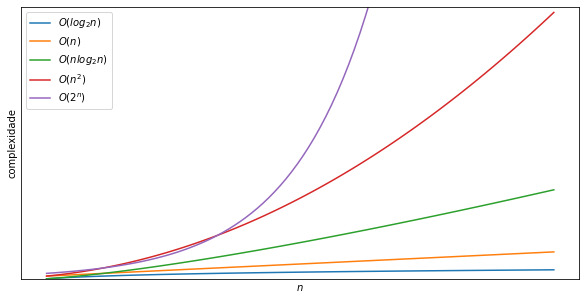

In [2]:
n = np.arange(1, 10, 0.1)
plt.figure(figsize=(10, 5))
plt.plot(n, np.log2(n), label=r'$O(log_2 n)$')
plt.plot(n, n, label=r'$O(n)$')
plt.plot(n, n*np.log2(n), label=r'$O(n log_2 n)$')
plt.plot(n, n*n, label=r'$O(n^2)$')
plt.plot(n, 2**n, label=r'$O(2^n)$')
plt.legend()
plt.xlabel(r'$n$')
plt.xticks([])
plt.ylabel('complexidade')
plt.yticks([])
plt.ylim((0, 100))
plt.savefig('figures/complexity.png', dpi=300)
plt.show()

# Aprendizado supervisionado

### Criação de dados de treinamento com uma dimensão

In [3]:
np.random.seed(42)
X = np.vstack(np.arange(0, 2.2, 0.2))
y = 4 + 3 * X + np.random.randn(11, 1)
y = y.ravel()

### Função para exibir os dados

In [4]:
def plot_data_1D(X, y, c='k.'):
    plt.figure(figsize=(10, 5))
    plt.plot(X, y, c, markersize=10)
    plt.xlabel('$X$')
    plt.ylabel('$y$')
    plt.axis([0, 2, 0, 15])

Exibindo os dados de treinamento

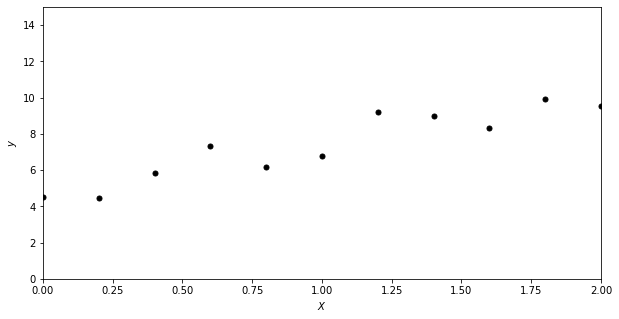

In [5]:
plot_data_1D(X, y)
plt.savefig('figures/1D_samples.png', dpi=300)
plt.show()

### Treinamento dos modelos regressores

In [6]:
X_new = np.vstack(np.arange(0, 2, 0.01))

# Regressão Linear
lr = LinearRegression()
lr.fit(X, y)
lr_pred = lr.predict(X_new)

# Àrvores de Decisão
dtr = DecisionTreeRegressor()
dtr.fit(X, y)
dtr_pred = dtr.predict(X_new)

# Florestas Aleatórias
rfr = RandomForestRegressor()
rfr.fit(X, y)
rfr_pred = rfr.predict(X_new)

# Perceptron Multicamadas
mlpr = MLPRegressor(early_stopping=True, max_iter=100000)
mlpr.fit(X, y)
mlpr_pred = mlpr.predict(X_new)

### Visualização da Árvore de Decisão

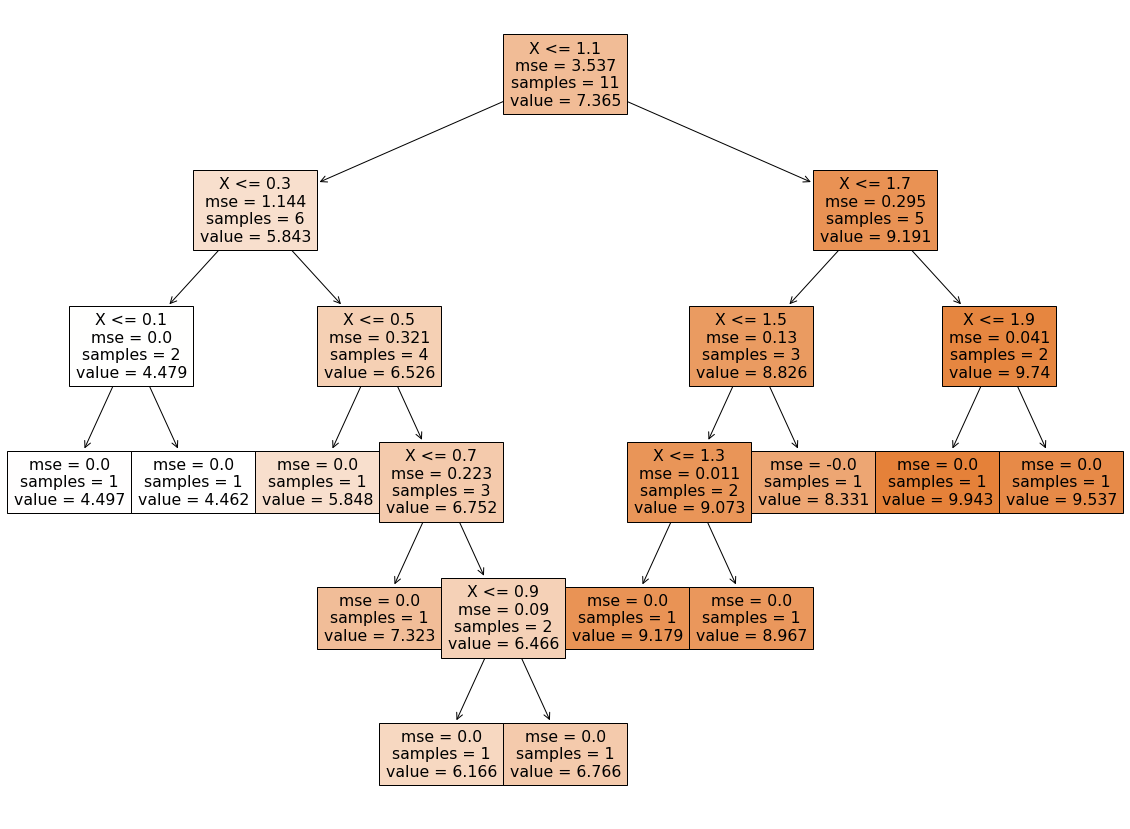

In [7]:
plt.figure(figsize=(20, 15))
_ = tree.plot_tree(dtr, feature_names='X', filled=True)
plt.savefig('figures/dtr.png')

### Regressores da Árvore de Decisão e Floresta Aleatória

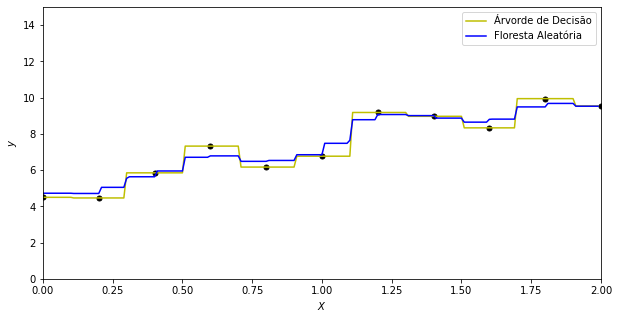

In [8]:
plot_data_1D(X, y)
plt.plot(X_new, dtr_pred, c='y', label='Árvorde de Decisão')
plt.plot(X_new, rfr_pred, c='b', label='Floresta Aleatória')
plt.legend()
plt.savefig('figures/dtr_rfr.png', dpi=300)
plt.show()

### Regressor Linear

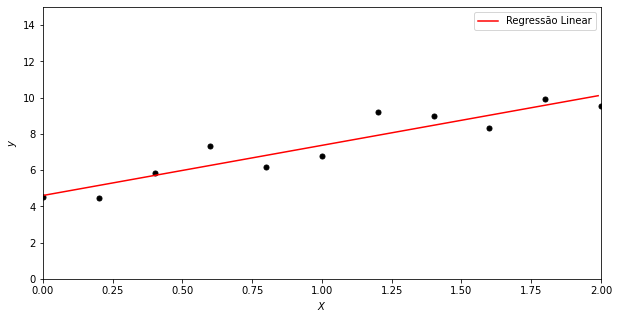

In [9]:
plot_data_1D(X, y)
plt.plot(X_new, lr_pred, c='r', label='Regressão Linear')
plt.legend()
plt.savefig('figures/lr.png', dpi=300)
plt.show()

### *Percetron* Multicamadas

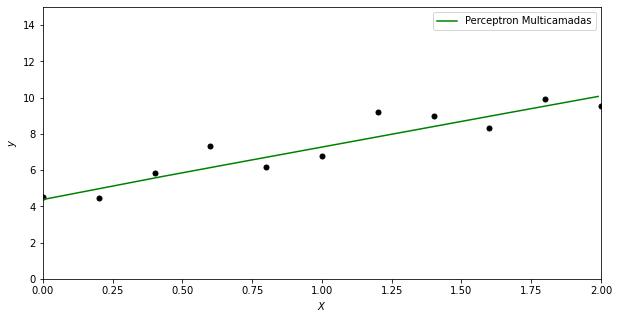

In [10]:
plot_data_1D(X, y)
plt.plot(X_new, mlpr_pred, c='g', label='Perceptron Multicamadas')
plt.legend()
plt.savefig('figures/mlpr.png', dpi=300)
plt.show()

### Comparativo entre Regressores Lineares, Floresta Aleatória e Perceptron Multicamadas

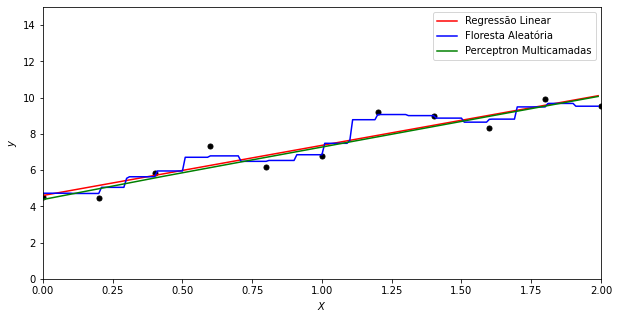

In [11]:
plot_data_1D(X, y)
plt.plot(X_new, lr_pred, c='r', label='Regressão Linear')
plt.plot(X_new, rfr_pred, c='b', label='Floresta Aleatória')
plt.plot(X_new, mlpr_pred, c='g', label='Perceptron Multicamadas')
plt.legend()
plt.savefig('figures/lr_mlpr_rfr.png', dpi=300)
plt.show()

# Aprendizado não supervisionado

### Criação de dados de treinamento com duas dimensões

In [12]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X_1, y_1 = make_blobs(n_samples=[57, 31, 88, 12, 99], centers=blob_centers, cluster_std=blob_std, random_state=7)
X_2, y_2 = make_blobs(n_samples=[44, 51, 52, 39, 51], centers=blob_centers, cluster_std=blob_std, random_state=8)
X_3, y_3 = make_blobs(n_samples=[61, 83, 17, 73, 23], centers=blob_centers, cluster_std=blob_std, random_state=9)
X_4, y_4 = make_blobs(n_samples=[53, 37, 50, 31, 62], centers=blob_centers, cluster_std=blob_std, random_state=10)

In [13]:
X = np.concatenate((X_1, X_2, X_3))
y = np.concatenate((y_1, y_2, y_3))

### Função para exibir os dados

In [14]:
def plot_data_2D(X, y=None):
    plt.xlabel("$longitude$")
    plt.ylabel("$latitude$")
    plt.scatter(X[:, 0], X[:, 1], c=y, s=10)

### Distribuição das amostras

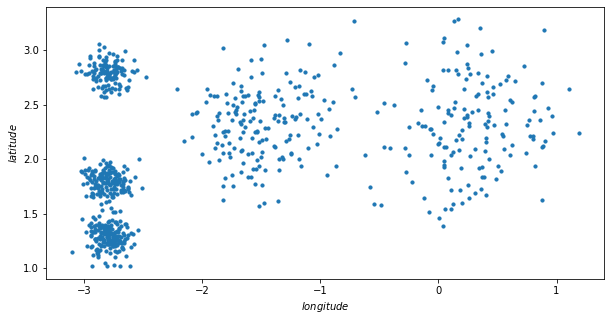

In [15]:
plt.figure(figsize=(10, 5))
plot_data_2D(X)
plt.savefig('figures/2D_samples.png', dpi=300)
plt.show()

### Divisão da região em grades

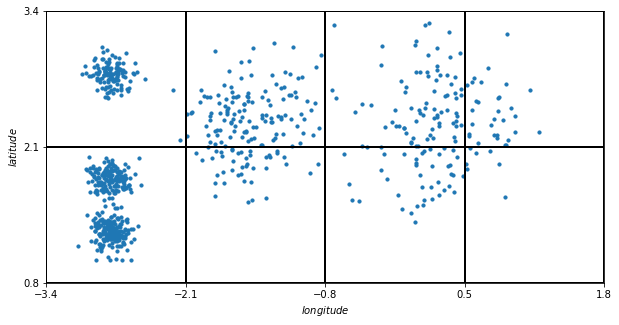

In [16]:
plt.figure(figsize=(10, 5))
plot_data_2D(X)
plt.grid(color='k', linewidth=2)
plt.xticks([-3.4, -2.1, -0.8, 0.5, 1.8])
plt.yticks([0.8, 2.1, 3.4])
plt.savefig('figures/grid.png', dpi=300)
plt.show()

### Agrupamento utilizando *K-Means*

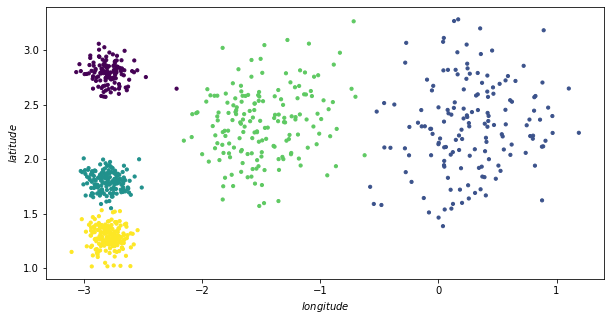

In [17]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)
plt.figure(figsize=(10, 5))
plot_data_2D(X, kmeans.predict(X))
plt.savefig('figures/kmeans.png', dpi=300)
plt.show()

### Função para exibir células *Voronoi*
Dado o conjunto de dados e o modelo *K-Means*, exibe as fronteiras de decisão do modelo

In [18]:
def plot_voronoi(X, kmeans, colors=None):
    resolution=1000
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution), np.linspace(mins[1], maxs[1], resolution))
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, colors='k')
    if colors:
        plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), levels=5, alpha=0.5, colors=colors)

### Função para exibir os centróides
Dado o modelo *K-Means*, exibe as posições dos centróides

In [19]:
def plot_centroids(kmeans):
    centroids = kmeans.cluster_centers_
    plt.scatter(centroids[:,0], centroids[:,1], marker='x', s=1, linewidths=10, c='white', zorder=11, alpha=1)
    plt.scatter(centroids[:,0], centroids[:,1], marker='o', s=30, linewidths=8, c='red', zorder=10, alpha=0.9)

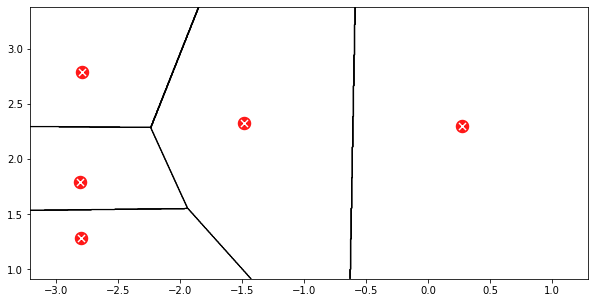

In [20]:
plt.figure(figsize=(10, 5))
plot_voronoi(X, kmeans)
plot_centroids(kmeans)
plt.savefig('figures/voronoi.png', dpi=300)
plt.show()

### Bordas de Decisão

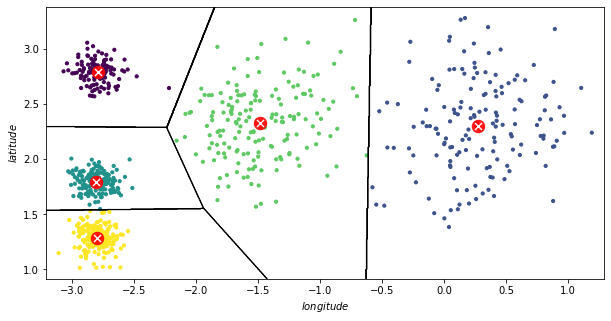

In [21]:
plt.figure(figsize=(10, 5))
plot_voronoi(X, kmeans)
plot_data_2D(X, kmeans.predict(X))
plot_centroids(kmeans)
plt.savefig('figures/boundary.png', dpi=300)
plt.show()

### Iterações K-Means

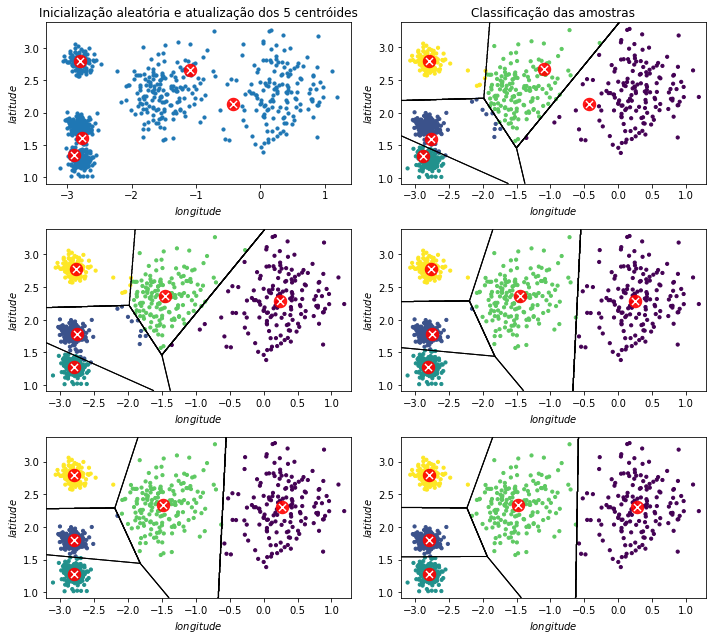

In [22]:
seed = 81
kmeans1 = KMeans(n_clusters=k, init='random', n_init=1, max_iter=1, random_state=seed).fit(X)
kmeans2 = KMeans(n_clusters=k, init='random', n_init=1, max_iter=2, random_state=seed).fit(X)
kmeans3 = KMeans(n_clusters=k, init='random', n_init=1, max_iter=3, random_state=seed).fit(X)
plt.figure(figsize=(10, 9))

plt.subplot(321)
plt.title('Inicialização aleatória e atualização dos 5 centróides')
plot_data_2D(X)
plot_centroids(kmeans1)

plt.subplot(322)
plt.title('Classificação das amostras')
plot_data_2D(X, kmeans1.predict(X))
plot_voronoi(X, kmeans1)
plot_centroids(kmeans1)

plt.subplot(323)
plot_data_2D(X, kmeans1.predict(X))
plot_voronoi(X, kmeans1)
plot_centroids(kmeans2)

plt.subplot(324)
plot_data_2D(X, kmeans2.predict(X))
plot_voronoi(X, kmeans2)
plot_centroids(kmeans2)

plt.subplot(325)
plot_data_2D(X, kmeans2.predict(X))
plot_voronoi(X, kmeans2)
plot_centroids(kmeans3)

plt.subplot(326)
plot_data_2D(X, kmeans3.predict(X))
plot_voronoi(X, kmeans3)
plot_centroids(kmeans3)

plt.tight_layout()
plt.savefig('figures/update.png', dpi=300)

### Diferenças com o número de agrupamentos

In [23]:
conditions = [
    (X[:,1] > 2.1) & (X[:,0] < -2.1),
    (X[:,1] > 2.1) & (X[:,0] > -2.1) & (X[:,0] < -0.8),
    (X[:,1] > 2.1) & (X[:,0] > -0.8) & (X[:,0] < 0.5),
    (X[:,1] > 2.1) & (X[:,0] > 0.5),
    (X[:,1] < 2.1) & (X[:,0] < -2.1),
    (X[:,1] < 2.1) & (X[:,0] > -2.1) & (X[:,0] < -0.8),
    (X[:,1] < 2.1) & (X[:,0] > -0.8) & (X[:,0] < 0.5),
    (X[:,1] < 2.1) & (X[:,0] > 0.5),
]
choices = ['blue', 'orange', 'green', 'brown', 'purple', 'pink', 'gray', 'cyan']
df = pd.DataFrame(data=X, columns=['LATITUDE', 'LONGITUDE'])
df['BAIRRO'] = np.select(conditions, choices)
init_clusters = df[['BAIRRO', 'LATITUDE', 'LONGITUDE']].groupby(['BAIRRO']).mean().dropna().to_numpy()
n_clusters, _ = init_clusters.shape

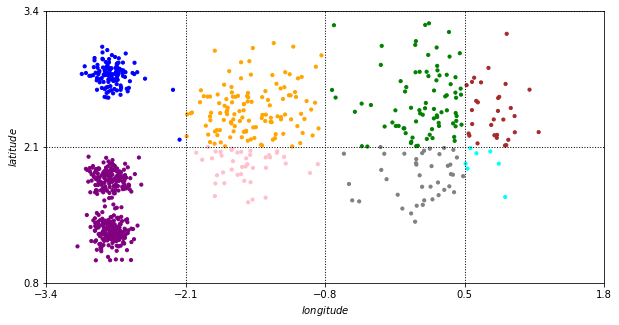

In [24]:
plt.figure(figsize=(10, 5))
plot_data_2D(X, df['BAIRRO'])
plt.grid(color='k', linewidth=1, linestyle=':')
plt.xticks([-3.4, -2.1, -0.8, 0.5, 1.8])
plt.yticks([0.8, 2.1, 3.4])
plt.savefig('figures/borough_distribution.png', dpi=300)
plt.show()

### Função para exibir o comportamento do algoritmo *K-Means*
Dado o número de agrupamentos, posição inicial dos centróides e a cor de cada amostra, exibe a posição inicial dos centróides, a posição final e o resultado da classificação com as fronteiras de decisão.

In [25]:
def plot_behavior(n_clusters, init_clusters, color):
    km_start  = KMeans(n_clusters=n_clusters, init=init_clusters, random_state=seed, max_iter=1).fit(X)
    km_finish = KMeans(n_clusters=n_clusters, init=init_clusters, random_state=seed).fit(X)
    plt.figure(figsize=(10, 3.5))

    plt.subplot(121)
    plt.title('Inicialização dos centróides')
    plot_data_2D(X, color)
    plot_centroids(km_start)

    plt.subplot(122)
    plt.title('Classificação das amostras')
    plot_data_2D(X, color)
    plot_voronoi(X, km_finish)
    plot_centroids(km_finish)
    
    plt.tight_layout()

### Agrupamento definido
Agrupamento com 8 centróides iniciados aleatoriamente

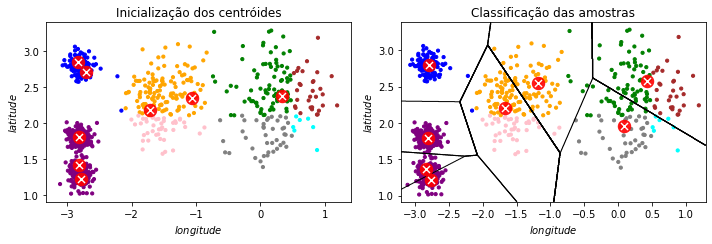

In [26]:
plot_behavior(8, 'random', df['BAIRRO'])
plt.savefig('figures/defined_behavior.png', dpi=300)

### Agrupamento dinâmico
Agrupamento com 8 centróides definidos pelos números de bairros afetados e iniciados pela posição média das amostras de cada bairro

/opt/conda/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)
/opt/conda/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


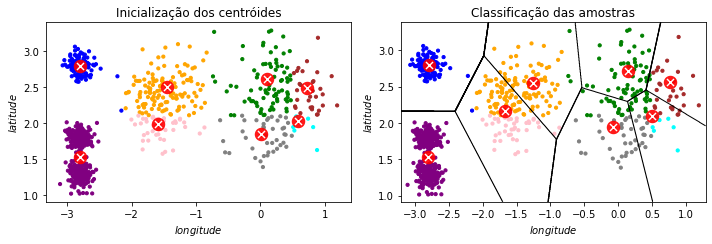

In [27]:
plot_behavior(n_clusters, init_clusters, df['BAIRRO'])
plt.savefig('figures/dynamic_behavior.png', dpi=300)

# Séries Temporais

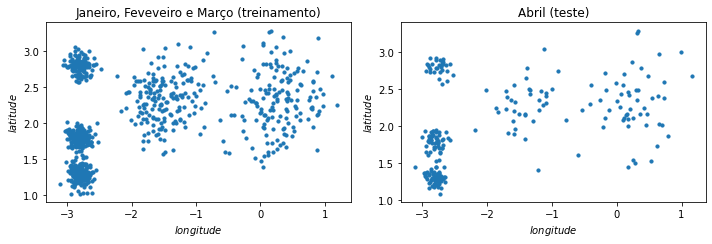

In [28]:
plt.figure(figsize=(10, 3.5))

plt.subplot(121)
plt.title('Janeiro, Feveveiro e Março (treinamento)')
plot_data_2D(X)

plt.subplot(122)
plt.title('Abril (teste)')
plot_data_2D(X_4)

plt.tight_layout()
plt.savefig('figures/overview_1.png', dpi=300)

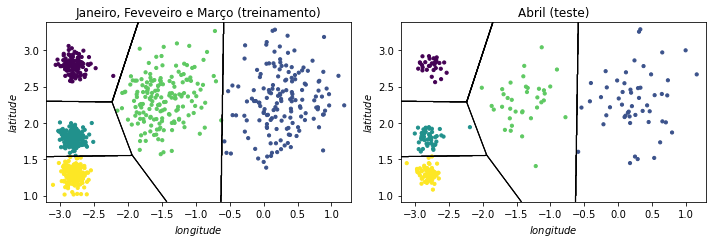

In [29]:
plt.figure(figsize=(10, 3.5))

plt.subplot(121)
plt.title('Janeiro, Feveveiro e Março (treinamento)')
plot_data_2D(X, kmeans.predict(X))
plot_voronoi(X, kmeans)

plt.subplot(122)
plt.title('Abril (teste)')
plot_data_2D(X_4, kmeans.predict(X_4))
plot_voronoi(X, kmeans)

plt.tight_layout()
plt.savefig('figures/overview_2.png', dpi=300)

### Distribuição das amostras por mês

In [30]:
def plot_values(centroids, values):
    for centroid, value in zip(centroids, values):
        plt.scatter(centroid[0]+0.5, centroid[1], marker=r'$ {} $'.format(value), s=400, c='red')

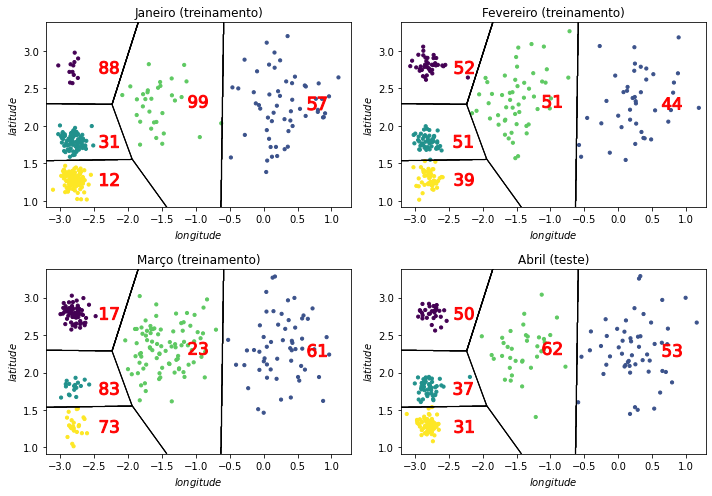

In [31]:
centroids = kmeans.cluster_centers_

plt.figure(figsize=(10, 7))

plt.subplot(221)
plt.title('Janeiro (treinamento)')
plot_data_2D(X_1, kmeans.predict(X_1))
plot_voronoi(X, kmeans)
plot_values(centroids, [88, 57, 31, 99, 12])

plt.subplot(222)
plt.title('Fevereiro (treinamento)')
plot_data_2D(X_2, kmeans.predict(X_2))
plot_voronoi(X, kmeans)
plot_values(centroids, [52, 44, 51, 51, 39])

plt.subplot(223)
plt.title('Março (treinamento)')
plot_data_2D(X_3, kmeans.predict(X_3))
plot_voronoi(X, kmeans)
plot_values(centroids, [17, 61, 83, 23, 73])

plt.subplot(224)
plt.title('Abril (teste)')
plot_data_2D(X_4, kmeans.predict(X_4))
plot_voronoi(X, kmeans)
plot_values(centroids, [50, 53, 37, 62, 31])

plt.tight_layout()
plt.savefig('figures/overview_3.png', dpi=300)

### Conjunto de dados de treinamento

In [32]:
grupo1 = [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
grupo2 = [0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
grupo3 = [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0]
grupo4 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0]
grupo5 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1]
mes    = [1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3]
crimes = [12, 39, 73, 88, 52, 17, 99, 51, 23, 31, 51, 83, 57, 44, 61]
limiar = median(crimes)
critico = [crime > limiar for crime in crimes]

df_train = pd.DataFrame({'GRUPO1': grupo1, 'GRUPO2': grupo2, 'GRUPO3': grupo3, 'GRUPO4': grupo4, 'GRUPO5': grupo5, 'MES': mes, 'CRIMES': crimes, 'CRITICO': critico})
df_train

,GRUPO1,GRUPO2,GRUPO3,GRUPO4,GRUPO5,MES,CRIMES,CRITICO
0,1,0,0,0,0,1,12,False
1,1,0,0,0,0,2,39,False
2,1,0,0,0,0,3,73,True
3,0,1,0,0,0,1,88,True
4,0,1,0,0,0,2,52,True
5,0,1,0,0,0,3,17,False
6,0,0,1,0,0,1,99,True
7,0,0,1,0,0,2,51,False
8,0,0,1,0,0,3,23,False
9,0,0,0,1,0,1,31,False


### Conjunto de dados de teste

In [33]:
grupo1 = [1, 0, 0, 0, 0]
grupo2 = [0, 1, 0, 0, 0]
grupo3 = [0, 0, 1, 0, 0]
grupo4 = [0, 0, 0, 1, 0]
grupo5 = [0, 0, 0, 0, 1]
mes    = [4, 4, 4, 4, 4]
crimes = [31, 50, 62, 37, 53]
critico = [crime > limiar for crime in crimes]

df_test = pd.DataFrame({'GRUPO1': grupo1, 'GRUPO2': grupo2, 'GRUPO3': grupo3, 'GRUPO4': grupo4, 'GRUPO5': grupo5, 'MES': mes, 'CRIMES': crimes, 'CRITICO': critico})
df_test

,GRUPO1,GRUPO2,GRUPO3,GRUPO4,GRUPO5,MES,CRIMES,CRITICO
0,1,0,0,0,0,4,31,False
1,0,1,0,0,0,4,50,False
2,0,0,1,0,0,4,62,True
3,0,0,0,1,0,4,37,False
4,0,0,0,0,1,4,53,True


### Preparação dos dados

In [34]:
X_train = df_train.loc[:, 'GRUPO1': 'MES']
y_train = df_train.loc[:, 'CRIMES']
c_train = df_train.loc[:, 'CRITICO']
X_test = df_test.loc[:, 'GRUPO1': 'MES']
y_test = df_test.loc[:, 'CRIMES']
c_test = df_test.loc[:, 'CRITICO']

### Predição com Regressão Linear

In [35]:
lr = LinearRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)
c_pred = y_pred > limiar

Previsão (classes preditas)

In [36]:
c_pred

array([False, False,  True, False, False])

Teste (classes reais)

In [37]:
c_test.to_numpy()

array([False, False,  True, False,  True])

### Acurácia

In [38]:
accuracy_score(c_test, c_pred)

0.8

### Medida F<sub>1</sub>
Medida F<sub>1</sub> balanceada

In [39]:
f1_score(c_test, c_pred, average='weighted')

0.7809523809523808

Medida F<sub>1</sub> da classe F

In [40]:
F = f1_score(c_test, c_pred, pos_label=0)
F

0.8571428571428571

Medida F<sub>1</sub> da classe V

In [41]:
V = f1_score(c_test, c_pred, pos_label=1)
V

0.6666666666666666

Medida F<sub>1</sub> balanceada

In [42]:
F*.6 + V*.4

0.7809523809523808

### Visualização da previsão

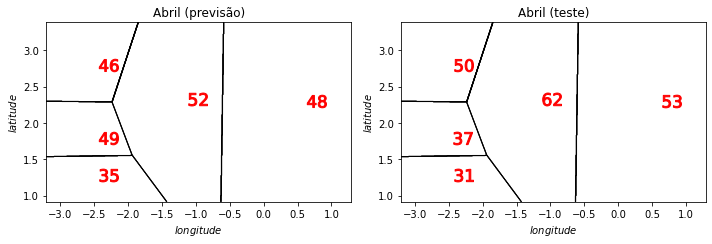

In [43]:
centroids = kmeans.cluster_centers_

plt.figure(figsize=(10, 3.5))

plt.subplot(121)
plt.title('Abril (previsão)')
plot_voronoi(X, kmeans)
plot_values(centroids, [46, 48, 49, 52, 35])
plt.xlabel("$longitude$")
plt.ylabel("$latitude$")

plt.subplot(122)
plt.title('Abril (teste)')
plot_voronoi(X, kmeans)
plot_values(centroids, [50, 53, 37, 62, 31])
plt.xlabel("$longitude$")
plt.ylabel("$latitude$")

plt.tight_layout()
plt.savefig('figures/overview_4.png', dpi=300)

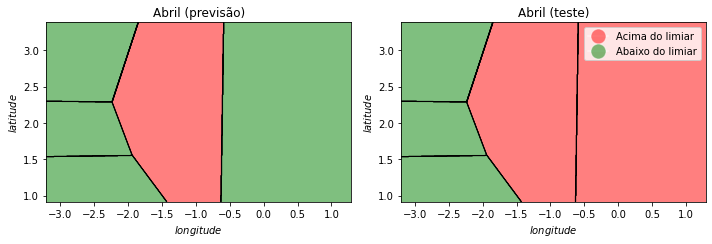

In [44]:
plt.figure(figsize=(10, 3.5))

plt.subplot(121)
plt.title('Abril (previsão)')
plot_voronoi(X, kmeans, ['green', 'green', 'green', 'red', 'green'])
plt.xlabel("$longitude$")
plt.ylabel("$latitude$")

plt.subplot(122)
plt.title('Abril (teste)')
plot_voronoi(X, kmeans, ['green', 'red', 'green', 'red', 'green'])
plt.xlabel("$longitude$")
plt.ylabel("$latitude$")

legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='r', alpha=0.5, markersize=15, label='Acima do limiar'), 
    Line2D([0], [0], marker='o', color='w', markerfacecolor='g', alpha=0.5, markersize=15, label='Abaixo do limiar')
]
plt.legend(handles=legend_elements)
plt.tight_layout()
plt.savefig('figures/overview_5.png', dpi=300)